In [ ]:
import pandas as pd
import numpy as np
import numbers
import seaborn as sns
from sklearn.metrics import accuracy_score
import matplotlib.pyplot as plt
from matplotlib import pyplot as plt
from sklearn.metrics import confusion_matrix
from sklearn.svm import SVC
from sklearn.neighbors import KNeighborsClassifier
from sklearn.model_selection import train_test_split
from sklearn.ensemble import RandomForestClassifier
from sklearn.naive_bayes import GaussianNB
from sklearn.linear_model import LogisticRegression
from sklearn.neural_network import MLPClassifier
from sklearn.tree import DecisionTreeClassifier
#from keras.wrappers.scikit_learn import KerasClassifier
#from tensorflow.keras.models import Sequential
#from tensorflow.keras.layers import Dense, Activation
#from tensorflow.keras.callbacks import EarlyStopping
#from keras.utils.vis_utils import plot_model
import seaborn as sns
sns.set()
from sklearn import preprocessing
from sklearn.metrics import mean_squared_error
from math import sqrt
import time
start = time.time()
from sklearn.metrics import roc_auc_score, roc_curve
from sklearn import metrics
#!pip install Float

from google.colab import drive

drive.mount('/content/drive')



Mounted at /content/drive


In [ ]:
from google.colab import drive
drive.mount('/content/drive')

Drive already mounted at /content/drive; to attempt to forcibly remount, call drive.mount("/content/drive", force_remount=True).


In [ ]:


df = pd.read_csv('/content/drive/MyDrive/Colab Notebooks/milknew - Converted.csv')

df.head()




,pH,Temprature,Taste,Odor,Fat,Turbidity,Colour,Grade,C_Grade
0,6.6,35,1,0,1,0,254,high,3
1,6.6,36,0,1,0,1,253,high,3
2,8.5,70,1,1,1,1,246,low,1
3,9.5,34,1,1,0,1,255,low,1
4,6.6,37,0,0,0,0,255,medium,2


In [ ]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1059 entries, 0 to 1058
Data columns (total 9 columns):
 #   Column      Non-Null Count  Dtype  
---  ------      --------------  -----  
 0   pH          1059 non-null   float64
 1   Temprature  1059 non-null   int64  
 2   Taste       1059 non-null   int64  
 3   Odor        1059 non-null   int64  
 4   Fat         1059 non-null   int64  
 5   Turbidity   1059 non-null   int64  
 6   Colour      1059 non-null   int64  
 7   Grade       1059 non-null   object 
 8   C_Grade     1059 non-null   int64  
dtypes: float64(1), int64(7), object(1)
memory usage: 74.6+ KB


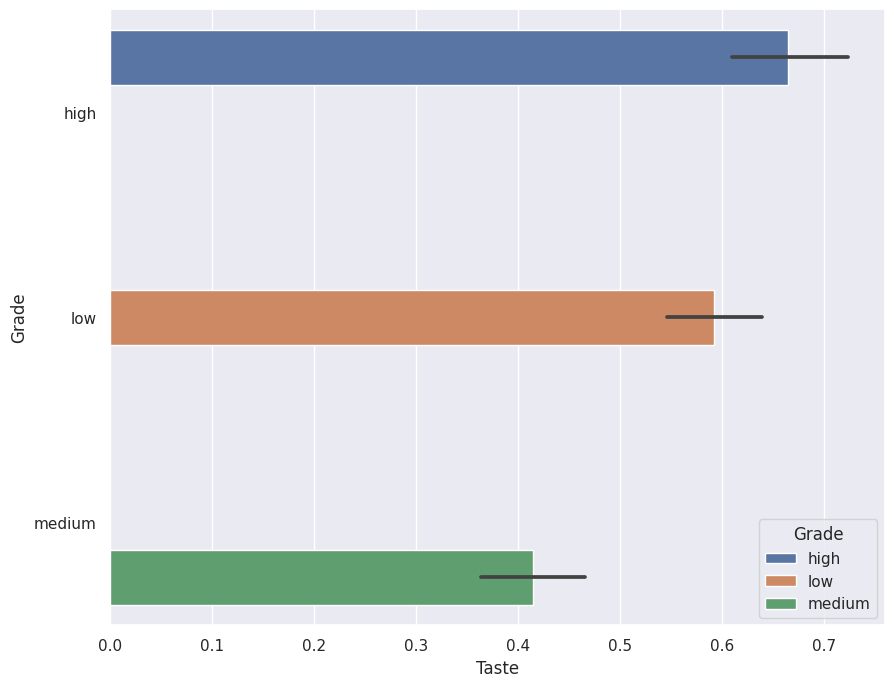

In [ ]:
plt.figure(figsize=(10,8))
sns.barplot(x='Taste',y='Grade',hue='Grade',data=df)
plt.show()

TypeError: countplot() got multiple values for argument 'data'

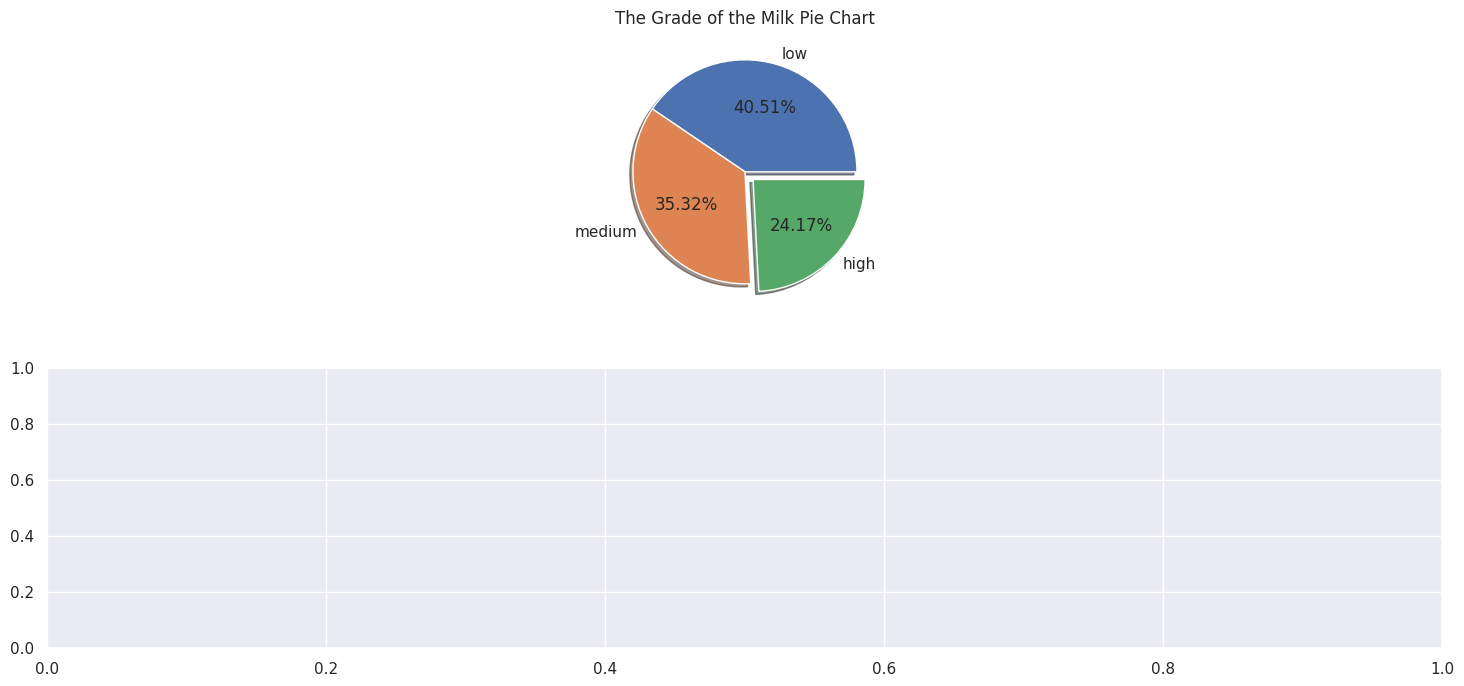

In [ ]:
f, ax = plt.subplots(2, figsize=(18,8))
df['Grade'].value_counts().plot.pie(explode=[0,0,0.1],ax=ax[0], autopct='%.2f%%', shadow = True)
ax[0].set_title('The Grade of the Milk Pie Chart')
ax[0].set_ylabel(' ')
sns.countplot('Grade', data = df, ax= ax[1])
ax[1].set_title('The Quantity of Low, Medium and High Milk Quality')
plt.show()

In [ ]:
#Label_encoder object knows how to understand word labels.
#label_encoder = preprocessing.LabelEncoder()

#Encode labels in column 'species'.
#df['Label']= label_encoder.fit_transform(df['xy'])

In [ ]:
X = df.iloc[:,0:7].values
y = df.iloc[:, 8:].values


In [ ]:
y

array([[3],
       [3],
       [1],
       ...,
       [1],
       [3],
       [1]])

In [ ]:
# Split into training and testing data
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.30, random_state=1)

/usr/local/lib/python3.10/dist-packages/sklearn/neighbors/_classification.py:215: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples,), for example using ravel().
  return self._fit(X, y)


1.0
0.9937106918238994
Training time: 216.46975660324097
Test time: 6.031990051269531e-05
RMSE 0.07930515857181442
KNN, accuracy: 0.9937106918238994 F1 score:0.9937241305165834
[[142   0   0]
 [  0 103   2]
 [  0   0  71]]


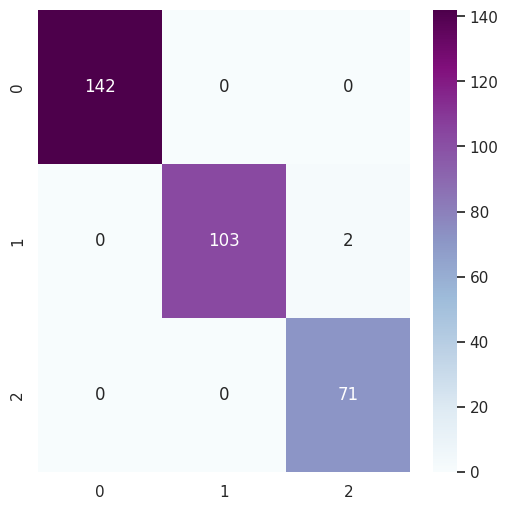

In [ ]:
# Create the KNN classifier
knn = KNeighborsClassifier(n_neighbors=1)
# Fit the classifier to the training data
knn.fit(X_train, y_train)
#training= accuracy_score(X_train, y_train)
print(knn.score(X_train, y_train))
#Calculate the accuracy of the model
print(knn.score(X_test, y_test))
#Predict the class labels using the testing data
y_pred = knn.predict(X_test)
train_pred = knn.predict(X_train)

end = time.time()
knn_diff=end-start
print("Training time: " + str(knn_diff))
starttest = time.time()
endtest =time.time()
knn_difftest = endtest-starttest
print("Test time: " + str(knn_difftest))

accuracy = accuracy_score(y_test, y_pred)

z = mean_squared_error(y_test, y_pred)
error = sqrt(mean_squared_error(y_test, y_pred))
print("RMSE", error)


print("KNN, accuracy: " + str(metrics.accuracy_score(y_test, y_pred)) + " F1 score:" + str(metrics.f1_score(y_test, y_pred,average='weighted')))
matrixdt = confusion_matrix(y_test,y_pred)
fig, ax = plt.subplots(figsize=(6, 6))
sns.heatmap(matrixdt,annot=True,fmt='d',cmap="BuPu", ax=ax)
print(matrixdt)


Starting Decision tree
Training time: 276.9070529937744
Test time: 0.002683401107788086
RMSE 0.11215443081840885
Decision Tree, accuracy: 0.9968553459119497 F1 score:0.9968497115933148
[[142   0   0]
 [  0 105   0]
 [  1   0  70]]


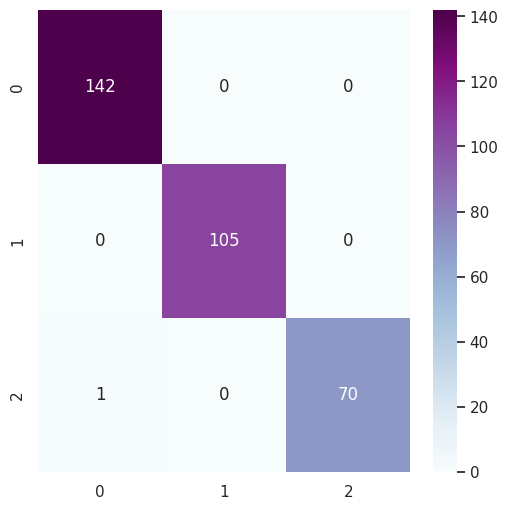

In [ ]:
#Decision tree
print("Starting Decision tree")
clf = DecisionTreeClassifier()
clf = clf.fit(X_train,y_train)
end = time.time()
dt_diff=end-start
print("Training time: " + str(dt_diff))
starttest = time.time()
y_pred_dt = clf.predict(X_test)
train_pred_dt = clf.predict(X_train)
y_pred_dt_roc = clf.predict_proba(X_test)
endtest =time.time()
dt_difftest = endtest-starttest
print("Test time: " + str(dt_difftest))

z = mean_squared_error(y_test, y_pred)
error = sqrt(mean_squared_error(y_test, y_pred_dt))
print("RMSE", error)

print("Decision Tree, accuracy: " + str(metrics.accuracy_score(y_test, y_pred_dt)) + " F1 score:" + str(metrics.f1_score(y_test, y_pred_dt,average='weighted')))
matrixdt = confusion_matrix(y_test,y_pred_dt)
fig, ax = plt.subplots(figsize=(6, 6))
sns.heatmap(matrixdt,annot=True,fmt='d',cmap="BuPu", ax=ax)
print(matrixdt)

Starting Random forest
building tree 1 of 100
building tree 2 of 100
building tree 3 of 100
building tree 4 of 100
building tree 5 of 100
building tree 6 of 100
building tree 7 of 100
building tree 8 of 100
building tree 9 of 100
building tree 10 of 100
building tree 11 of 100
building tree 12 of 100
building tree 13 of 100
building tree 14 of 100
building tree 15 of 100
building tree 16 of 100
building tree 17 of 100
building tree 18 of 100
building tree 19 of 100
building tree 20 of 100
building tree 21 of 100
building tree 22 of 100
building tree 23 of 100
building tree 24 of 100
building tree 25 of 100
building tree 26 of 100
building tree 27 of 100
building tree 28 of 100
building tree 29 of 100
building tree 30 of 100
building tree 31 of 100
building tree 32 of 100
building tree 33 of 100
building tree 34 of 100
building tree 35 of 100
building tree 36 of 100
building tree 37 of 100
building tree 38 of 100
building tree 39 of 100
building tree 40 of 100
building tree 41 of 100
bu

<ipython-input-16-c3158532805b>:5: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples,), for example using ravel().
  classifier.fit(X_train, y_train)
[Parallel(n_jobs=1)]: Done  40 tasks      | elapsed:    0.1s


building tree 72 of 100
building tree 73 of 100
building tree 74 of 100
building tree 75 of 100
building tree 76 of 100
building tree 77 of 100
building tree 78 of 100
building tree 79 of 100
building tree 80 of 100
building tree 81 of 100
building tree 82 of 100
building tree 83 of 100
building tree 84 of 100
building tree 85 of 100
building tree 86 of 100
building tree 87 of 100
building tree 88 of 100
building tree 89 of 100
building tree 90 of 100
building tree 91 of 100
building tree 92 of 100
building tree 93 of 100
building tree 94 of 100
building tree 95 of 100
building tree 96 of 100
building tree 97 of 100
building tree 98 of 100
building tree 99 of 100
building tree 100 of 100
Training time: 457.833131313324
Test time: 0.03190326690673828
RMSE 0.0
Random Forest, accuracy: 1.0 F1 score:1.0


[Parallel(n_jobs=1)]: Done  40 tasks      | elapsed:    0.0s
[Parallel(n_jobs=1)]: Done  40 tasks      | elapsed:    0.0s


[[142   0   0]
 [  0 105   0]
 [  0   0  71]]


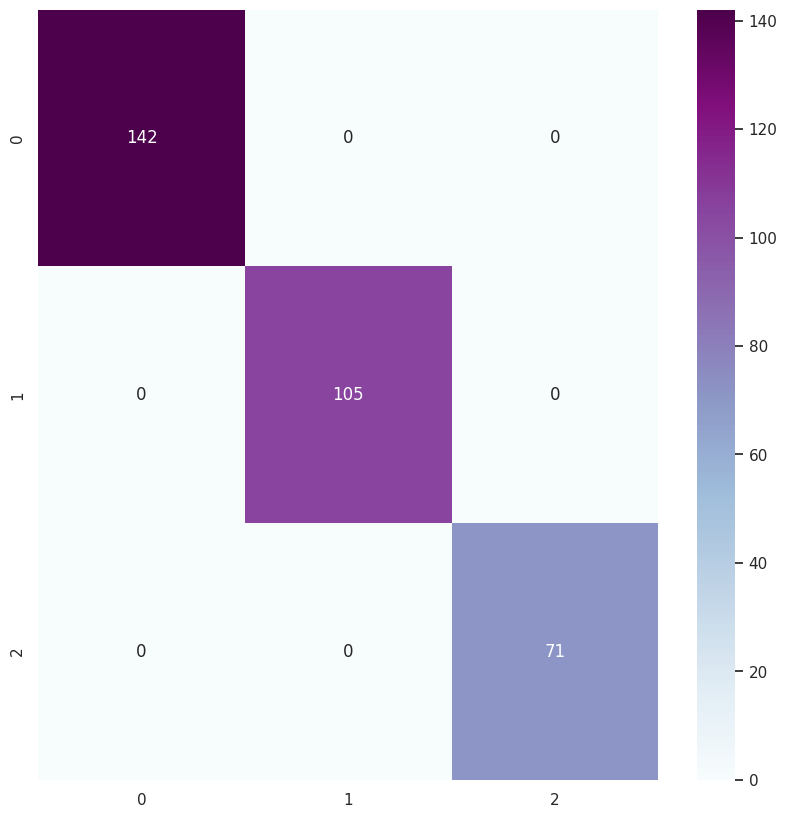

In [ ]:
#RandomForest
print("Starting Random forest")
seed = 7
classifier = RandomForestClassifier(verbose=2,random_state=seed)
classifier.fit(X_train, y_train)
end = time.time()
rf_diff=end-start
print("Training time: " + str(rf_diff))
starttest = time.time()
y_pred_random = classifier.predict(X_test)
train_pred_rf = classifier.predict(X_train)
endtest =time.time()
rf_difftest = endtest-starttest
print("Test time: " + str(rf_difftest))

z = mean_squared_error(y_test, y_pred)
error = sqrt(mean_squared_error(y_test, y_pred_random))
print("RMSE", error)

print("Random Forest, accuracy: " + str(metrics.accuracy_score(y_test, y_pred_random)) + " F1 score:" + str(metrics.f1_score(y_test, y_pred_random,average='weighted')))
matrixrf = confusion_matrix(y_test,y_pred_random)
fig, ax = plt.subplots(figsize=(10, 10))
sns.heatmap(matrixrf,annot=True,fmt='d',cmap="BuPu", ax=ax)
print(matrixrf)

Starting Naive Bayes
Training time: 551.4181504249573
Test time: 0.0007898807525634766
RMSE 0.38033417944002146
Naive Bayes, accuracy: 0.9213836477987422 F1 score:0.9230962390314097


/usr/local/lib/python3.10/dist-packages/sklearn/utils/validation.py:1143: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  y = column_or_1d(y, warn=True)


[[129   6   7]
 [  0  93  12]
 [  0   0  71]]


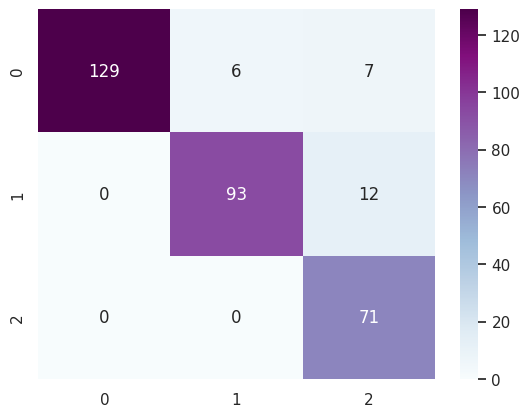

In [ ]:
#Create Naive Bayes Classifier
print("Starting Naive Bayes")
gnb = GaussianNB()
gnb.fit(X_train, y_train)
end = time.time()
diff=end-start
print("Training time: " + str(diff))
starttest = time.time()
y_pred_nb = gnb.predict(X_test)
endtest =time.time()
difftest = endtest-starttest
print("Test time: " + str(difftest))

z = mean_squared_error(y_test, y_pred)
error = sqrt(mean_squared_error(y_test, y_pred_nb))
print("RMSE", error)

print("Naive Bayes, accuracy: " + str(metrics.accuracy_score(y_test, y_pred_nb)) + " F1 score:" + str(metrics.f1_score(y_test, y_pred_nb,average='weighted')))
matrixnv = confusion_matrix(y_test,y_pred_nb)
sns.heatmap(matrixnv,annot=True,fmt='d',cmap="BuPu")
print(matrixnv)

/usr/local/lib/python3.10/dist-packages/sklearn/utils/validation.py:1143: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  y = column_or_1d(y, warn=True)


Accuracy = 91.19496855345912 %
RMSE 0.40437855108625176
SVM, accuracy: 0.9119496855345912 F1 score:0.9123239416951011
[[136   2   4]
 [  5  88  12]
 [  4   1  66]]


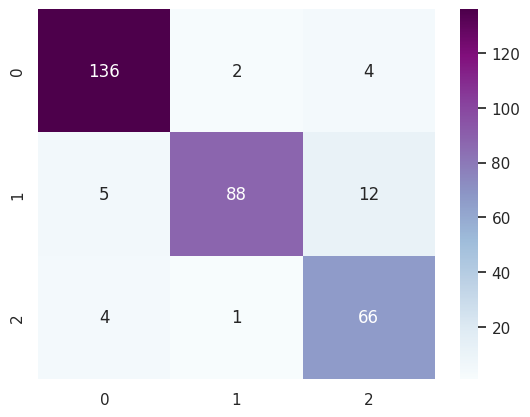

In [ ]:
model = SVC(kernel='linear')
model.fit(X_train, y_train)
y_pred_svm = model.predict(X_test)
accuracy = model.score(X_test, y_test)
print(f"Accuracy = {accuracy*100} %")

z = mean_squared_error(y_test, y_pred)
error = sqrt(mean_squared_error(y_test, y_pred_svm))
print("RMSE", error)



print("SVM, accuracy: " + str(metrics.accuracy_score(y_test, y_pred_svm)) + " F1 score:" + str(metrics.f1_score(y_test, y_pred_svm,average='weighted')))
matrixnv = confusion_matrix(y_test,y_pred_svm)
sns.heatmap(matrixnv,annot=True,fmt='d',cmap="BuPu")
print(matrixnv)